In [14]:
library(ggplot2)
library(dplyr)
library(lubridate)

In [1]:
#1) read the data and import in a data.frame or tibble structure

feb = read.csv("/home/alcadis/Desktop/ASPA/Exercises/Ex1/JC-201902-citibike-tripdata.csv")
mar = read.csv("/home/alcadis/Desktop/ASPA/Exercises/Ex1/JC-201903-citibike-tripdata.csv")
apr = read.csv("/home/alcadis/Desktop/ASPA/Exercises/Ex1/JC-201904-citibike-tripdata.csv")
may = read.csv("/home/alcadis/Desktop/ASPA/Exercises/Ex1/JC-201905-citibike-tripdata.csv")
jun = read.csv("/home/alcadis/Desktop/ASPA/Exercises/Ex1/JC-201906-citibike-tripdata.csv")

In [2]:
#2) merge the five data frames in an unique structure

dataset = rbind(feb, mar, apr, may, jun)

head(dataset, 5)
nrow(feb)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>
1,142,2019-02-01 15:35:02.0820,2019-02-01 15:37:24.1360,3183,Exchange Place,40.71625,-74.03346,3639,Harborside,40.71925,-74.03423,29677,Subscriber,1963,1
2,223,2019-02-01 17:00:46.8900,2019-02-01 17:04:30.5500,3183,Exchange Place,40.71625,-74.03346,3681,Grand St,40.71518,-74.03768,26234,Subscriber,1992,2
3,106,2019-02-01 17:08:01.3260,2019-02-01 17:09:47.4400,3183,Exchange Place,40.71625,-74.03346,3184,Paulus Hook,40.71415,-74.03355,29588,Subscriber,1960,1
4,370,2019-02-01 17:09:31.2100,2019-02-01 17:15:41.6550,3183,Exchange Place,40.71625,-74.03346,3211,Newark Ave,40.72153,-74.04630,29250,Subscriber,1976,1
5,315,2019-02-01 17:19:53.2490,2019-02-01 17:25:09.1400,3183,Exchange Place,40.71625,-74.03346,3273,Manila & 1st,40.72165,-74.04288,29586,Subscriber,1980,1


[1] 18565

In [3]:
#3) check for missing data and remove it, if any

any(is.na(dataset))

[1] FALSE

In [4]:
#4.1) compute the average and the median trip duration in minutes

tp_avg = mean(dataset$tripduration)
tp_median = median(dataset$tripduration)
print(paste("The average of the trip duration is: ", round(tp_avg,2), "s"))
print(paste("The median of the trip duration is: ", tp_median, "s"))

[1] "The average of the trip duration is:  768.64 s"
[1] "The median of the trip duration is:  341 s"


In [5]:
#4.2) evaluate the minimum and maximum trip duration; does that sound like a reasonable value?

tp_min = min(dataset$tripduration)
tp_max = max(dataset$tripduration)
print(paste("The min trip duration is: ", tp_min, "s"))
print(paste("The max trip duration is: ", tp_max, "s or", round(tp_max/3600,2), "hours"))
#clearly there's something not okay with the max trip duration

[1] "The min trip duration is:  61 s"
[1] "The max trip duration is:  1729020 s or 480.28 hours"


In [6]:
#4.3) repeat the calculation of the average (and the median) trip duration by excluding trips longer than
#3 hours. Next, evaluate the number of skimmed entries

less_dataset = dataset[dataset$tripduration < 3*3600, ,drop=FALSE]
tp_avg_less = mean(less_dataset$tripduration)
tp_median_less = median(less_dataset$tripduration)
print(paste("The average of trips that are under 3 hours is: ", round(tp_avg_less,2), "s"))
print(paste("The median of trips that are under 3 hours is: ", tp_median_less, "s"))

[1] "The average of trips that are under 3 hours is:  553.31 s"
[1] "The median of trips that are under 3 hours is:  340 s"


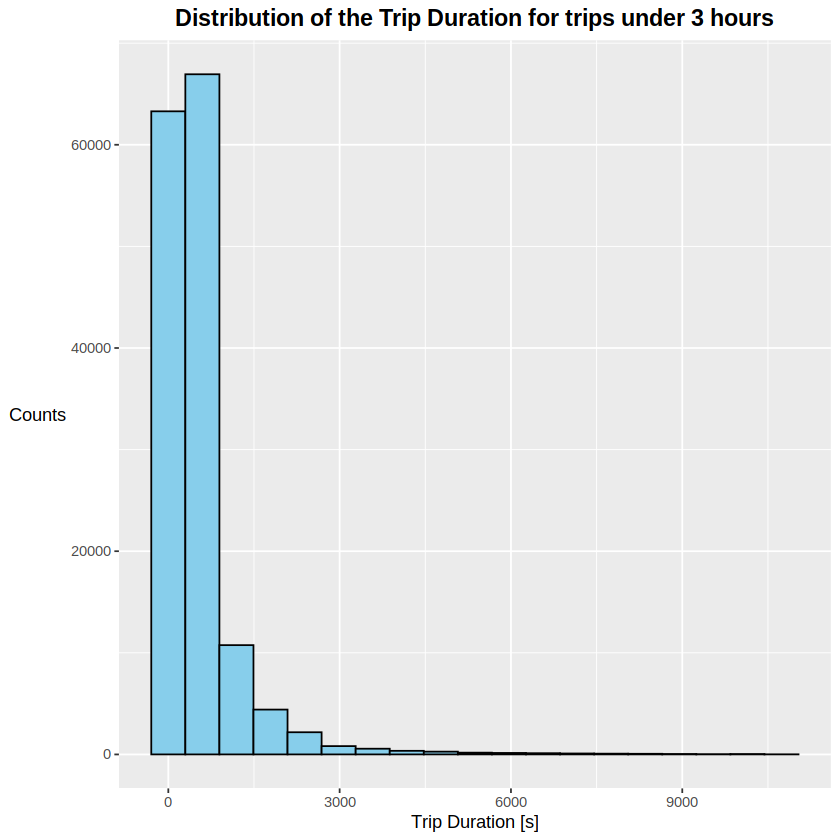

In [7]:
#4.4) plot the distribution of trip duration after the skimming of the previous point

#i'll try 3 different bins calculations and choose the one i found the best
bins1 = ceiling(sqrt(length(less_dataset$tripduration))) #Square Root Rule
bins2 = ceiling(log2(length(less_dataset$tripduration)) + 1) #Sturges' Rule
bins3 = ceiling(2 * (length(less_dataset$tripduration))^(1/3)) #Rice Rule

ggplot(less_dataset, aes(x=tripduration)) +
    geom_histogram(bins=bins2, fill="sky blue", color="black") +
    labs(x="Trip Duration [s]" ,y="Counts" ,title="Distribution of the Trip Duration for trips under 3 hours") +
    theme(plot.title = element_text(hjust = 0.5, size = 14, face = "bold"), axis.title.y = element_text(angle = 0, vjust = 0.5))

$feb
[1] 605.34

$mar
[1] 546.18

$apr
[1] 714

$may
[1] 824.12

$jun
[1] 973.69

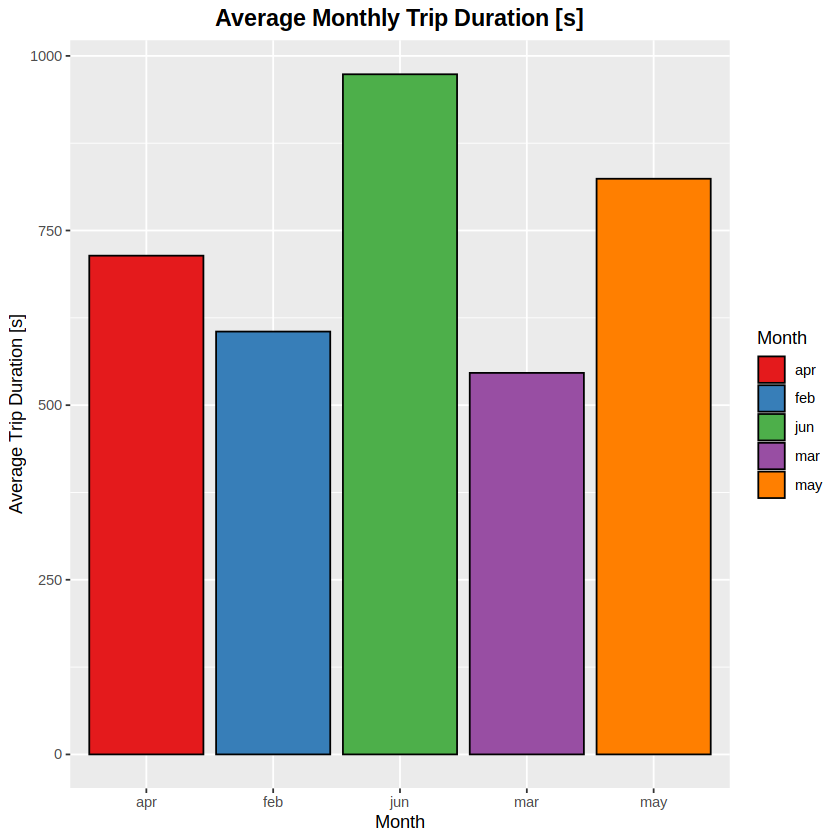

In [8]:
#5) plot the monthly average trip duration

months = list(feb = feb, mar = mar, apr = apr, may = may, jun = jun)
tp_month_avg_list = list()

for (month in names(months)) {
  tp_month_avg = round(mean(months[[month]]$tripduration), 2)
  tp_month_avg_list[[month]] <- tp_month_avg
}

tp_month_avg_list

avg_trip_data <- data.frame(
  Month = names(tp_month_avg_list),
  Average_Trip_Duration = unlist(tp_month_avg_list)
)

ggplot(avg_trip_data, aes(x=Month, y=Average_Trip_Duration, fill=Month)) +
    geom_bar(stat ="identity", color="black") + #stat="identity" so that it will use the values and not counts
    labs(title="Average Monthly Trip Duration [s]", x="Month", y="Average Trip Duration [s]") +
    theme(plot.title=element_text(hjust=0.5, size=14, face="bold")) +
    scale_fill_brewer(palette="Set1") #nice for colorblind people

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


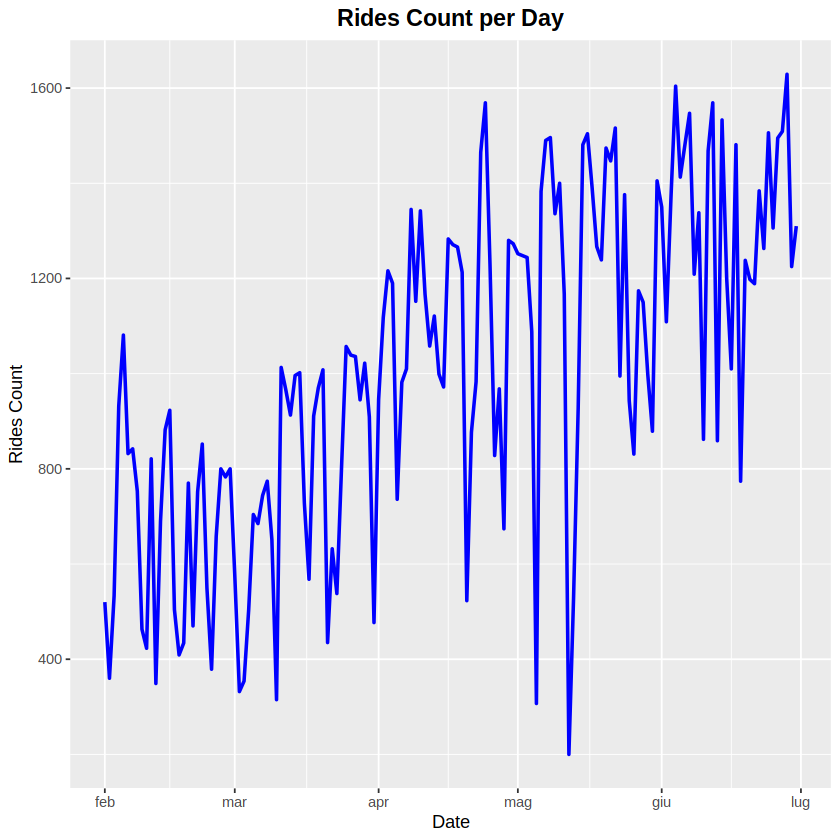

In [9]:
#6.1) plot the number of rides per day

daily_rides <- aggregate(x=list(ride_count=as.Date(dataset$starttime)), by=list(date=as.Date(dataset$starttime)), FUN=length)

ggplot(daily_rides, aes(x=date, y=ride_count)) +
  geom_line(color="blue", linewidth=1) +
  labs(x="Date", y="Rides Count", title="Rides Count per Day") +
  theme(plot.title=element_text(hjust=0.5, size=14, face="bold"))

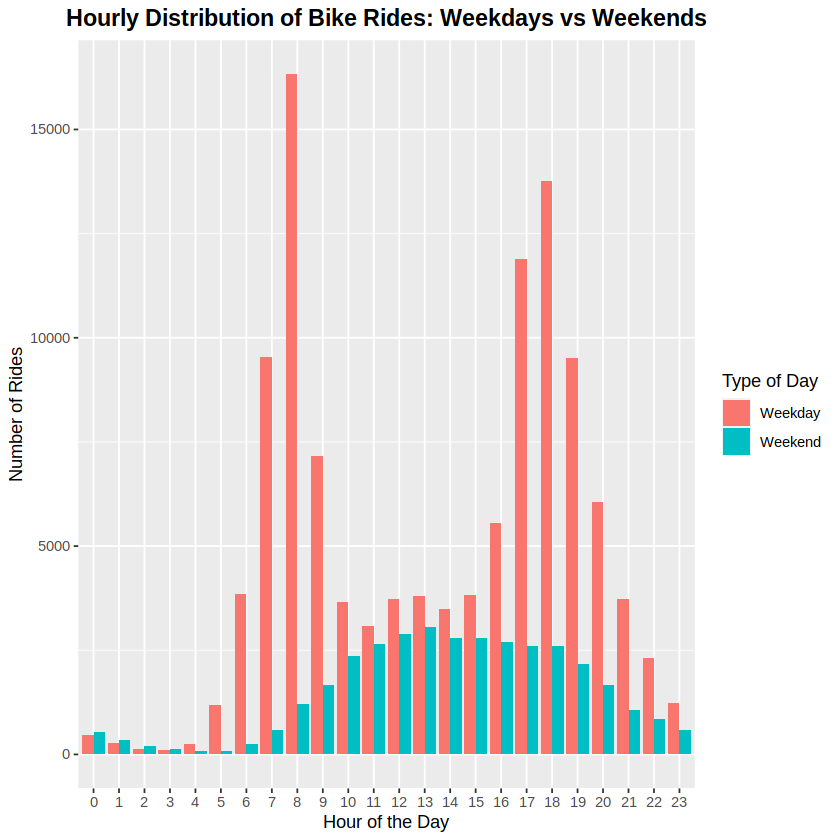

In [18]:
#6.2) plot the hourly distribution on weekdays and on weekends

dataset$hour <- hour(dataset$starttime)
dataset$day_of_week <- wday(dataset$starttime)
dataset$type_of_day <- ifelse(dataset$day_of_week %in% c(1, 7), "Weekend", "Weekday")

ggplot(dataset, aes(x=factor(hour), fill=type_of_day)) +
  geom_bar(position="dodge", stat="count") +
  scale_x_discrete(name="Hour of the Day", breaks=0:23, labels=as.character(0:23)) +
  labs(y = "Number of Rides", title="Hourly Distribution of Bike Rides: Weekdays vs Weekends", fill = "Type of Day") +
  theme(plot.title=element_text(hjust=0.5, size=14, face="bold"))